In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch  , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 1 0 0 1 1 0 2 1 0 0 1 1 1 0 1 2 0 0 1 1 0 0 1 0 1 2 1 1]


In [7]:
for image_batch  , label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[164. 161. 170.]
  [179. 176. 185.]
  [122. 119. 128.]
  ...
  [174. 173. 181.]
  [174. 173. 181.]
  [174. 173. 181.]]

 [[162. 159. 168.]
  [115. 112. 121.]
  [132. 129. 138.]
  ...
  [174. 173. 181.]
  [174. 173. 181.]
  [174. 173. 181.]]

 [[149. 146. 155.]
  [148. 145. 154.]
  [108. 105. 114.]
  ...
  [175. 174. 182.]
  [174. 173. 181.]
  [174. 173. 181.]]

 ...

 [[153. 149. 163.]
  [143. 139. 153.]
  [130. 126. 140.]
  ...
  [147. 149. 162.]
  [146. 148. 161.]
  [146. 148. 161.]]

 [[108. 104. 118.]
  [171. 167. 181.]
  [116. 112. 126.]
  ...
  [149. 151. 164.]
  [150. 152. 165.]
  [151. 153. 166.]]

 [[132. 128. 142.]
  [122. 118. 132.]
  [146. 142. 156.]
  ...
  [148. 150. 163.]
  [151. 153. 166.]
  [153. 155. 168.]]]


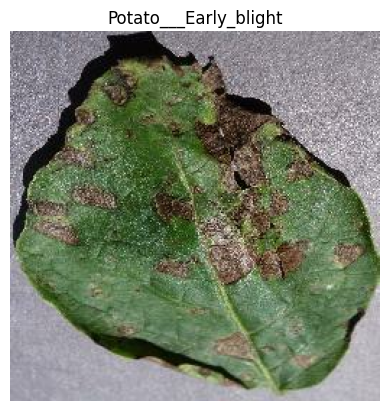

In [8]:
for image_batch  , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [9]:
len(dataset)

68

In [10]:
# 80% ==> training
# 20% ==> 10% validation 10% test

In [11]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_pattitions_tf(ds , train_split = 0.8, val_split = 0.1 , test_split = 0.1 , shuffle=True,shuffle_size = 1000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    test_size = int(ds_size*test_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds = get_dataset_pattitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [25]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 23s 202ms/step - loss: 0.9036 - accuracy: 0.5087 - val_loss: 0.8470 - val_accuracy: 0.4323
Epoch 2/50
54/54 [==============================] - 10s 186ms/step - loss: 0.7846 - accuracy: 0.6308 - val_loss: 0.6576 - val_accuracy: 0.7135
Epoch 3/50
54/54 [==============================] - 10s 183ms/step - loss: 0.4356 - accuracy: 0.8223 - val_loss: 0.2529 - val_accuracy: 0.8958
Epoch 4/50
54/54 [==============================] - 10s 181ms/step - loss: 0.2810 - accuracy: 0.8877 - val_loss: 0.3365 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 10s 181ms/step - loss: 0.2642 - accuracy: 0.8981 - val_loss: 0.1969 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 10s 188ms/step - loss: 0.2174 - accuracy: 0.9155 - val_loss: 0.1442 - val_accuracy: 0.9583
Epoch 7/50
54/54 [==============================] - 10s 192ms/step - loss: 0.1717 - accuracy: 0.9340 - val_loss: 0.2314 - val_accuracy: 0.9219

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 30ms/step - loss: 0.0533 - accuracy: 0.9805


In [30]:
scores

[0.053348712623119354, 0.98046875]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

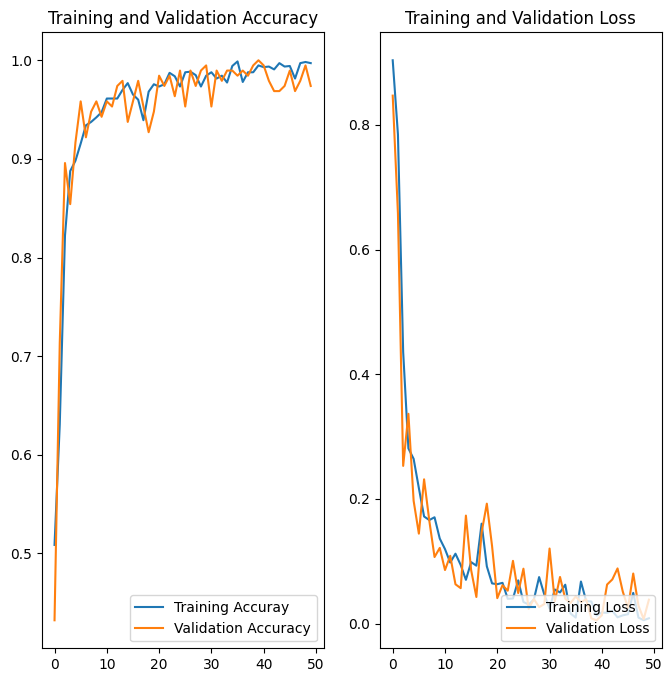

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuray")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
Actual label: Potato___Early_blight
1/1 [==============================] - 0s 114ms/step
Predicted Label: Potato___Early_blight


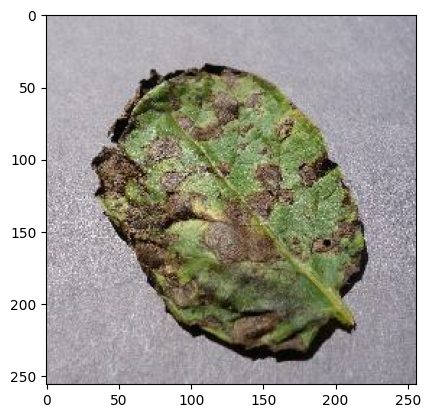

In [36]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[[0]])),2)

    return predicted_class,confidence
    

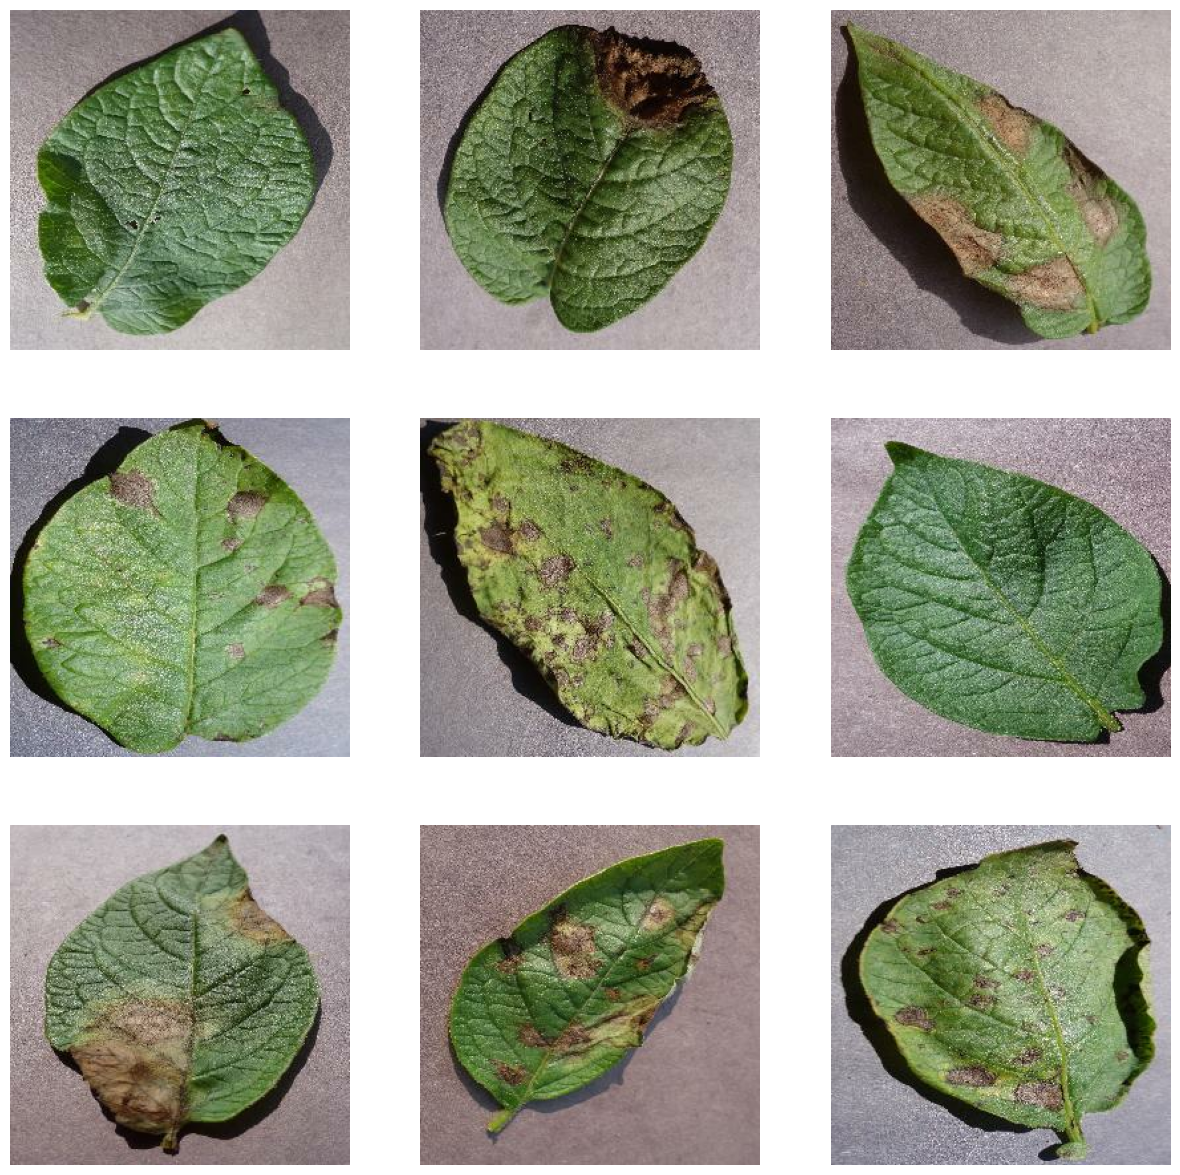

In [38]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

In [39]:
model.save("../potatoes.h5")

In [40]:
# model_version = 2
# model.save(f"../Models/{model_version}")